<a href="https://colab.research.google.com/github/amanjain-iitb/Stock_Prediction/blob/main/SVM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt 
import pandas as pd 

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df = pd.read_csv('/content/drive/My Drive/stock_data/NSEI.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-29,10311.950195,10337.950195,10223.599609,10312.400391,10312.400391,574500.0
1,2020-06-30,10382.599609,10401.049805,10267.349609,10302.099609,10302.099609,556200.0
2,2020-07-01,10323.799805,10447.049805,10299.599609,10430.049805,10430.049805,573600.0
3,2020-07-02,10493.049805,10598.200195,10485.549805,10551.700195,10551.700195,597400.0
4,2020-07-03,10614.950195,10631.299805,10562.650391,10607.349609,10607.349609,525200.0


In [13]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.5+ KB


In [14]:
data = pd.DataFrame()
data['day'] = pd.to_numeric(df['Date'].str.split('-').str[2])
data['month'] = pd.to_numeric(df['Date'].str.split('-').str[1])
data['year'] = pd.to_numeric(df['Date'].str.split('-').str[0])
data['prices'] = df['Close']

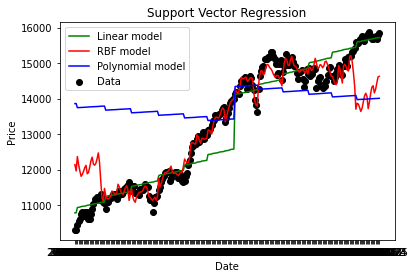

In [15]:
dates = data.drop('prices', axis = 1)
prices = data['prices']

svr_lin  = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=10)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Fit regression model
svr_lin.fit(dates, prices)
svr_poly.fit(dates, prices)
svr_rbf.fit(dates, prices)

plt.scatter(df['Date'], prices, c='k', label='Data')
plt.plot(df['Date'], svr_lin.predict(dates), c='g', label='Linear model')
plt.plot(df['Date'], svr_rbf.predict(dates), c='r', label='RBF model')    
plt.plot(df['Date'], svr_poly.predict(dates), c='b', label='Polynomial model')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()